###합성 콜 옵션 (Synthetic Call Option)
합성 콜 옵션은 주식 포지션과 풋 옵션을 조합하여 생성할 수 있습니다. 기본적으로 주식을 매수하고 동일한 행사가격과 만기일을 가진 풋 옵션을 매도하여 합성 콜 옵션을 만듭니다.

###합성 풋 옵션 (Synthetic Put Option)
합성 풋 옵션은 주식 포지션과 콜 옵션을 조합하여 생성할 수 있습니다. 주식을 매도하고 동일한 행사가격과 만기일을 가진 콜 옵션을 매도하여 합성 풋 옵션을 만듭니다.

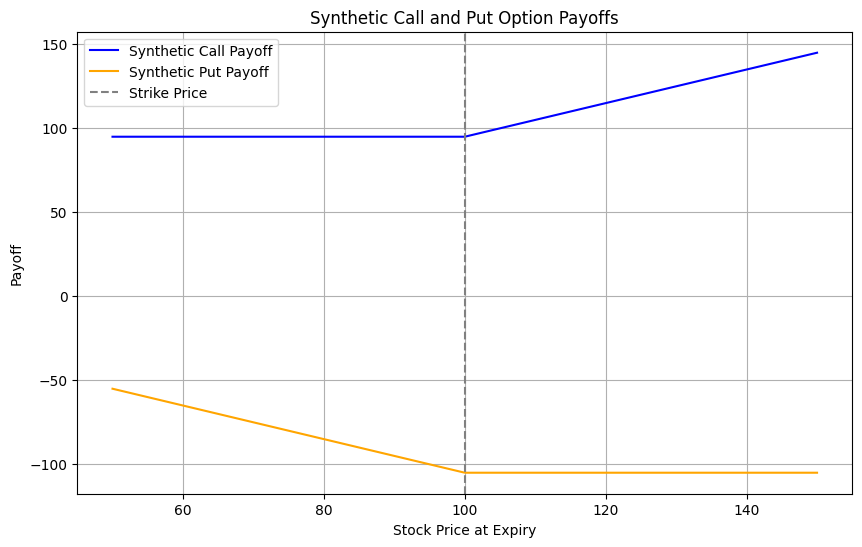

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def synthetic_call(stock_price, strike_price, put_premium, stock_position=1):
    """
    합성 콜 옵션의 페이오프 계산 함수

    Parameters:
    stock_price: 주식 가격의 배열
    strike_price: 행사가격
    put_premium: 풋 옵션 프리미엄
    stock_position: 주식 포지션 (기본값: 1)

    Returns:
    합성 콜 옵션의 페이오프 배열
    """
    put_payoff = np.maximum(strike_price - stock_price, 0) - put_premium
    stock_payoff = stock_position * stock_price
    synthetic_call_payoff = stock_payoff + put_payoff
    return synthetic_call_payoff

def synthetic_put(stock_price, strike_price, call_premium, stock_position=-1):
    """
    합성 풋 옵션의 페이오프 계산 함수

    Parameters:
    stock_price: 주식 가격의 배열
    strike_price: 행사가격
    call_premium: 콜 옵션 프리미엄
    stock_position: 주식 포지션 (기본값: -1)

    Returns:
    합성 풋 옵션의 페이오프 배열
    """
    call_payoff = np.maximum(stock_price - strike_price, 0) - call_premium
    stock_payoff = stock_position * stock_price
    synthetic_put_payoff = stock_payoff + call_payoff
    return synthetic_put_payoff

# 예제 파라미터
strike_price = 100
put_premium = 5
call_premium = 5
stock_prices = np.linspace(50, 150, 400)

# 합성 옵션의 페이오프 계산
synthetic_call_payoff = synthetic_call(stock_prices, strike_price, put_premium)
synthetic_put_payoff = synthetic_put(stock_prices, strike_price, call_premium)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, synthetic_call_payoff, label='Synthetic Call Payoff', color='blue')
plt.plot(stock_prices, synthetic_put_payoff, label='Synthetic Put Payoff', color='orange')
plt.axvline(x=strike_price, color='grey', linestyle='--', label='Strike Price')
plt.title('Synthetic Call and Put Option Payoffs')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()
